In [7]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [9]:
API_keys = os.getenv("API_keys")

In [10]:
print(type(API_keys))

<class 'str'>


In [11]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = API_keys)

In [12]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language = 'en')
                                    
        

In [13]:
# Fetch the ETH news articles
eth_articles = newsapi.get_everything(q='ETH', language = 'en')
analyzer.polarity_scores(eth_articles['articles'][1]['content'])

{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compound': 0.6369}

In [14]:
sentiment = []
for article in eth_articles['articles']:
    try:
        content = article['content']
        results = analyzer.polarity_scores(content)
        #neg = results['neg']
        #neu = results['neu']
        #pos = results['pos']
        #compound = results['compound']
        results['article'] = content
        sentiment.append(results)
        
        
        
    except Exception as error: 
        
        continue
eth = pd.DataFrame(sentiment)
eth

,neg,neu,pos,compound,article
0,0.000,0.933,0.067,0.2500,A team of researchers from the University of B...
1,0.000,0.860,0.140,0.6369,The bitcoin bulls are back in town.\r\nThe pri...
2,0.000,0.889,0.111,0.4767,A robot that turns portraits into manga. A ves...
3,0.165,0.764,0.071,-0.5859,"Konrad Steffen, a world-renowned climate scien..."
4,0.000,0.868,0.132,0.5719,"Across the lansdcape, steam vents hiss gaseous..."
5,0.000,0.914,0.086,0.4404,Thanks to technology from ETH spin-off Neustar...
6,0.000,0.909,0.091,0.4588,Konrad Steffen dedicated his life to studying ...
7,0.042,0.891,0.067,0.2263,"In most organisms, small bits of RNA play a ke..."
8,0.000,0.943,0.057,0.2484,Ethereum is one of the most growing cryptocurr...
9,0.000,1.000,0.000,0.0000,"To understand how chemical reactions begin, ch..."


In [15]:
# Create the Bitcoin sentiment scores DataFrame
sentiment = []
for article in btc_articles['articles']:
    try:
        content = article['content']
        results = analyzer.polarity_scores(content)
        #neg = results['neg']
        #neu = results['neu']
        #pos = results['pos']
        #compound = results['compound']
        results['article'] = content
        sentiment.append(results)
        
        
        
    except Exception as error: 
        
        continue
btc = pd.DataFrame(sentiment)
btc


,neg,neu,pos,compound,article
0,0.094,0.906,0.000,-0.4767,"Authorities in Tampa, Florida have arrested a ..."
1,0.000,0.851,0.149,0.5994,"Casa, a Colorado-based provider of bitcoin sec..."
2,0.074,0.926,0.000,-0.4019,"On July 15, a Discord user with the handle Kir..."
3,0.000,1.000,0.000,0.0000,"In April, the Secret Service seized 100 Bitcoi..."
4,0.000,0.860,0.140,0.6369,The bitcoin bulls are back in town.\r\nThe pri...
5,0.071,0.864,0.065,-0.0516,"The question still remained, though, whether a..."
6,0.000,0.878,0.122,0.5106,A ransomware variant called NetWalker is doing...
7,0.000,0.816,0.184,0.6249,Earlier this month a number of Twitter account...
8,0.157,0.843,0.000,-0.6808,Hillsborough State Attorney Andrew Warren anno...
9,0.000,0.937,0.063,0.2732,“The COVID-19 pandemic has resulted in a mass ...


In [16]:
# Create the ethereum sentiment scores DataFrame

sentiment = []
for article in eth_articles['articles']:
    try:
        content = article['content']
        results = analyzer.polarity_scores(content)
        #neg = results['neg']
        #neu = results['neu']
        #pos = results['pos']
        #compound = results['compound']
        results['article'] = content
        sentiment.append(results)
        
        
        
    except Exception as error: 
        
        continue
eth = pd.DataFrame(sentiment)
eth


,neg,neu,pos,compound,article
0,0.000,0.933,0.067,0.2500,A team of researchers from the University of B...
1,0.000,0.860,0.140,0.6369,The bitcoin bulls are back in town.\r\nThe pri...
2,0.000,0.889,0.111,0.4767,A robot that turns portraits into manga. A ves...
3,0.165,0.764,0.071,-0.5859,"Konrad Steffen, a world-renowned climate scien..."
4,0.000,0.868,0.132,0.5719,"Across the lansdcape, steam vents hiss gaseous..."
5,0.000,0.914,0.086,0.4404,Thanks to technology from ETH spin-off Neustar...
6,0.000,0.909,0.091,0.4588,Konrad Steffen dedicated his life to studying ...
7,0.042,0.891,0.067,0.2263,"In most organisms, small bits of RNA play a ke..."
8,0.000,0.943,0.057,0.2484,Ethereum is one of the most growing cryptocurr...
9,0.000,1.000,0.000,0.0000,"To understand how chemical reactions begin, ch..."


In [17]:
# Describe the Bitcoin Sentiment
btc.describe()

,neg,neu,pos,compound
count,20.00000,20.000000,20.000000,20.000000
mean,0.03530,0.897550,0.067150,0.147425
std,0.05445,0.058053,0.058475,0.437606
min,0.00000,0.762000,0.000000,-0.680800
25%,0.00000,0.859000,0.000000,-0.070700
50%,0.00000,0.910000,0.071000,0.295700
75%,0.07175,0.928000,0.097000,0.507000
max,0.15700,1.000000,0.184000,0.636900


In [18]:
# Describe the Ethereum Sentiment
eth.describe()

,neg,neu,pos,compound
count,18.000000,18.000000,18.000000,18.000000
mean,0.014389,0.901278,0.084333,0.294750
std,0.040560,0.068724,0.062756,0.350478
min,0.000000,0.733000,0.000000,-0.585900
25%,0.000000,0.873250,0.058250,0.208300
50%,0.000000,0.911500,0.069500,0.305600
75%,0.000000,0.941750,0.110000,0.548100
max,0.165000,1.000000,0.267000,0.897900


### Questions:

Q: Which coin had the highest mean positive score?

A: eth

Q: Which coin had the highest compound score?

A: eth

Q. Which coin had the highest positive score?

A: eth

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]
import spacy
from spacy import displacy

import nltk
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whelanpower/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# Expand the default stopwords list if necessary
lemmatizer = WordNetLemmatizer()

In [21]:
btc_article = btc_articles['articles'][5]['content']
btc_article

"The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars]"

In [22]:
eth_article = eth_articles['articles'][4]['content']
eth_article

'Across the lansdcape, steam vents hiss gaseous breath from deep inside the planet, creating an environment that feels like it hangs in the balance between our world and another.Stefanie Payne, A Year… [+2756 chars]'

In [23]:
btc_sentence = btc_article
btc_words = word_tokenize(btc_sentence)
print(btc_sentence)
print("-----------")
print(btc_words)

The question still remained, though, whether all that GPU-crunching would actually work. After months of hammering on the problem, Stay was finally ready to try. The Guy hadn't given the entire ZIP f… [+2880 chars]
-----------
['The', 'question', 'still', 'remained', ',', 'though', ',', 'whether', 'all', 'that', 'GPU-crunching', 'would', 'actually', 'work', '.', 'After', 'months', 'of', 'hammering', 'on', 'the', 'problem', ',', 'Stay', 'was', 'finally', 'ready', 'to', 'try', '.', 'The', 'Guy', 'had', "n't", 'given', 'the', 'entire', 'ZIP', 'f…', '[', '+2880', 'chars', ']']


In [24]:
eth_sentence = eth_article
eth_words = word_tokenize(eth_sentence)
print(eth_sentence)
print("------------")
print(eth_words)

Across the lansdcape, steam vents hiss gaseous breath from deep inside the planet, creating an environment that feels like it hangs in the balance between our world and another.Stefanie Payne, A Year… [+2756 chars]
------------
['Across', 'the', 'lansdcape', ',', 'steam', 'vents', 'hiss', 'gaseous', 'breath', 'from', 'deep', 'inside', 'the', 'planet', ',', 'creating', 'an', 'environment', 'that', 'feels', 'like', 'it', 'hangs', 'in', 'the', 'balance', 'between', 'our', 'world', 'and', 'another.Stefanie', 'Payne', ',', 'A', 'Year…', '[', '+2756', 'chars', ']']


In [25]:
btc_result = [lemmatizer.lemmatize(word) for word in btc_words]
print(btc_result)

['The', 'question', 'still', 'remained', ',', 'though', ',', 'whether', 'all', 'that', 'GPU-crunching', 'would', 'actually', 'work', '.', 'After', 'month', 'of', 'hammering', 'on', 'the', 'problem', ',', 'Stay', 'wa', 'finally', 'ready', 'to', 'try', '.', 'The', 'Guy', 'had', "n't", 'given', 'the', 'entire', 'ZIP', 'f…', '[', '+2880', 'char', ']']


In [26]:
eth_result = [lemmatizer.lemmatize(word) for word in eth_words]
print(eth_result)

['Across', 'the', 'lansdcape', ',', 'steam', 'vent', 'hiss', 'gaseous', 'breath', 'from', 'deep', 'inside', 'the', 'planet', ',', 'creating', 'an', 'environment', 'that', 'feel', 'like', 'it', 'hang', 'in', 'the', 'balance', 'between', 'our', 'world', 'and', 'another.Stefanie', 'Payne', ',', 'A', 'Year…', '[', '+2756', 'char', ']']


In [27]:
# Complete the tokenizer function
def btc_tokenizer(article):
    """Tokenizes article."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    sw_addon = {'share','introducing', 'announced', 'user', 'state', 'online', 'boomers', 'train', 'avocado'}
    
    # Substitute everything that is NOT a letter with empty string
    regex = re.compile("[^a-zA-Z ]")
    btc_re_clean = regex.sub('', btc_article)
        
    # Convert the words to lowercase
    btc_re_words = word_tokenize(btc_re_clean)
    btc_re_result = [word.lower() for word in btc_re_words if word.lower() not in sw.union(sw_addon)]
  
      
    # Lemmatize Words into root words
    btc_words = word_tokenize(btc_re_clean)
       
    btc_output = [word.lower() for word in btc_words if word.lower() not in sw.union(sw_addon)]
        
    
    return btc_output


In [28]:
# Complete the tokenizer function
def eth_tokenizer(article):
    """Tokenizes article."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    sw_addon = {'share','introducing', 'announced', 'user', 'state', 'online', 'boomers', 'train', 'avocado'}
    
    # Substitute everything that is NOT a letter with empty string
    regex = re.compile("[^a-zA-Z ]")
    eth_re_clean = regex.sub('', eth_article)
    
    # Convert the words to lowercase
    eth_re_words = word_tokenize(eth_re_clean)
    eth_re_result = [word.lower() for word in eth_re_words if word.lower() not in sw.union(sw_addon)]    
      
    # Lemmatize Words into root words
    eth_words = word_tokenize(eth_re_clean)
    
    eth_output = [word.lower() for word in eth_words if word.lower() not in sw.union(sw_addon)]
    
    
    return eth_output

In [29]:
# Display NLTK English stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
# Display the top 100 words in each coin headline (DataFrame) with their frequencies
print("Bitcoin Top 100 Words:")
print(Counter(" ".join(btc['article']).split()).most_common(100))

Bitcoin Top 100 Words:
[('chars]', 20), ('of', 20), ('the', 19), ('to', 18), ('in', 17), ('a', 16), ('Bitcoin', 15), ('on', 10), ('and', 8), ('Satoshi', 8), ('The', 7), ('that', 6), ('…', 6), ('for', 5), ('Twitter', 5), ('with', 5), ('another', 5), ('been', 5), ('hack', 4), ('accounts', 4), ('bitcoin', 4), ('has', 4), ('over', 4), ('Our', 4), ('robot', 4), ('colleague', 4), ('Nakaboto', 4), ('writes', 4), ('about', 4), ('every', 4), ('fucking', 4), ('day.', 4), ('Welcome', 4), ('edition', 4), ('Today,', 4), ('where', 4), ('I,', 4), ('Nakaboto,', 4), ('tell', 4), ('you', 4), ('whats', 4), ('going', 4), ('Florida', 3), ('arrested', 3), ('17-year-old', 3), ('like', 3), ('according', 3), ('was', 3), ('this', 3), ('Tampa,', 2), ('alleged', 2), ('July', 2), ('is', 2), ('their', 2), ('than', 2), ('using', 2), ('an', 2), ('I', 2), ('can', 2), ('In', 2), ('Secret', 2), ('Service', 2), ('100', 2), ('from', 2), ('letter', 2), ('his', 2), ('are', 2), ('price', 2), ('today', 2), ('by', 2), ('A', 2)

In [31]:
# Display the top 100 words in each coin headline (DataFrame) with their frequencies
print("Ethereum Top 100 Words:")
print(Counter(" ".join(eth['article']).split()).most_common(100))


Ethereum Top 100 Words:
[('of', 31), ('the', 30), ('chars]', 18), ('a', 14), ('in', 10), ('to', 10), ('and', 7), ('that', 7), ('from', 6), ('The', 6), ('A', 5), ('by', 4), ('for', 4), ('ETH', 4), ('RNA', 4), ('researchers', 3), ('have', 3), ('are', 3), ('price', 3), ('people', 3), ('climate', 3), ('an', 3), ('can', 3), ('gene', 3), ('…', 3), ('with', 3), ('new', 3), ('team', 2), ('University', 2), ('bitcoin', 2), ('back', 2), ('These', 2), ('Konrad', 2), ('Steffen,', 2), ('at', 2), ('on', 2), ('Swiss', 2), ('like', 2), ('it', 2), ('between', 2), ('spin-off', 2), ('studying', 2), ('years', 2), ('most', 2), ('Ethereum', 2), ('is', 2), ('you’re', 2), ('first', 2), ('how', 2), ('study', 2), ('many', 2), ('This', 2), ('On', 2), ('2,', 2), ('within', 2), ('as', 2), ('British', 1), ('Columbia,', 1), ('Princeton', 1), ('University,', 1), ('California,', 1), ('Berkeley', 1), ('Singapore-ETH', 1), ('Centre', 1), ('created', 1), ('bus', 1), ('stop-like', 1), ('pavilion', 1), ('can…', 1), ('[+172'

In [32]:
# Expand the default stopwords list with additionally words from both coin DataFramesif necessary

sw = set(stopwords.words('english'))
sw_addon = {'share','Introducing', 'announced', 'user', 'State', 'online', 'boomers', 'train', 'avocado'}
print(sw_addon)

{'avocado', 'State', 'share', 'Introducing', 'boomers', 'online', 'user', 'train', 'announced'}


In [33]:
# Create a new tokens column for ethereum
eth_tokens = []
eth_tokens = []
for eth_article in eth['article']:
    eth_tokens.append(eth_tokenizer(eth_article))
eth['tokens'] = eth_tokens
eth.head(10)

,neg,neu,pos,compound,article,tokens
0,0.000,0.933,0.067,0.2500,A team of researchers from the University of B...,"[team, researchers, university, british, colum..."
1,0.000,0.860,0.140,0.6369,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bulls, back, townthe, price, bitcoin..."
2,0.000,0.889,0.111,0.4767,A robot that turns portraits into manga. A ves...,"[robot, turns, portraits, manga, vest, helps, ..."
3,0.165,0.764,0.071,-0.5859,"Konrad Steffen, a world-renowned climate scien...","[konrad, steffen, worldrenowned, climate, scie..."
4,0.000,0.868,0.132,0.5719,"Across the lansdcape, steam vents hiss gaseous...","[across, lansdcape, steam, vents, hiss, gaseou..."
5,0.000,0.914,0.086,0.4404,Thanks to technology from ETH spin-off Neustar...,"[thanks, technology, eth, spinoff, neustark, c..."
6,0.000,0.909,0.091,0.4588,Konrad Steffen dedicated his life to studying ...,"[konrad, steffen, dedicated, life, studying, c..."
7,0.042,0.891,0.067,0.2263,"In most organisms, small bits of RNA play a ke...","[organisms, small, bits, rna, play, key, role,..."
8,0.000,0.943,0.057,0.2484,Ethereum is one of the most growing cryptocurr...,"[ethereum, one, growing, cryptocurrencies, rec..."
9,0.000,1.000,0.000,0.0000,"To understand how chemical reactions begin, ch...","[understand, chemical, reactions, begin, chemi..."


In [34]:
# Create a new tokens column for bitcoin
btc_tokens = []
for btc_article in btc['article']:
    btc_tokens.append(btc_tokenizer(btc_article))
btc['tokens'] = btc_tokens
btc.head(10)

,neg,neu,pos,compound,article,tokens
0,0.094,0.906,0.000,-0.4767,"Authorities in Tampa, Florida have arrested a ...","[authorities, tampa, florida, arrested, yearol..."
1,0.000,0.851,0.149,0.5994,"Casa, a Colorado-based provider of bitcoin sec...","[casa, coloradobased, provider, bitcoin, secur..."
2,0.074,0.926,0.000,-0.4019,"On July 15, a Discord user with the handle Kir...","[july, discord, handle, kirk, made, enticing, ..."
3,0.000,1.000,0.000,0.0000,"In April, the Secret Service seized 100 Bitcoi...","[april, secret, service, seized, bitcoins, cla..."
4,0.000,0.860,0.140,0.6369,The bitcoin bulls are back in town.\r\nThe pri...,"[bitcoin, bulls, back, townthe, price, bitcoin..."
5,0.071,0.864,0.065,-0.0516,"The question still remained, though, whether a...","[question, still, remained, though, whether, g..."
6,0.000,0.878,0.122,0.5106,A ransomware variant called NetWalker is doing...,"[ransomware, variant, called, netwalker, surpr..."
7,0.000,0.816,0.184,0.6249,Earlier this month a number of Twitter account...,"[earlier, month, number, twitter, accounts, be..."
8,0.157,0.843,0.000,-0.6808,Hillsborough State Attorney Andrew Warren anno...,"[hillsborough, attorney, andrew, warren, today..."
9,0.000,0.937,0.063,0.2732,“The COVID-19 pandemic has resulted in a mass ...,"[covid, pandemic, resulted, mass, shift, worki..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [35]:
from collections import Counter
from nltk import ngrams

In [36]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc.tokens]
dict(btc_bigram_counts[0].most_common(10))

{('authorities', 'tampa'): 1,
 ('tampa', 'florida'): 1,
 ('florida', 'arrested'): 1,
 ('arrested', 'yearold'): 1,
 ('yearold', 'alleged'): 1,
 ('alleged', 'mastermind'): 1,
 ('mastermind', 'behind'): 1,
 ('behind', 'twitter'): 1,
 ('twitter', 'bitcoin'): 1,
 ('bitcoin', 'hack'): 1}

In [37]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth.tokens]
dict(eth_bigram_counts[0].most_common(10))

{('team', 'researchers'): 1,
 ('researchers', 'university'): 1,
 ('university', 'british'): 1,
 ('british', 'columbia'): 1,
 ('columbia', 'princeton'): 1,
 ('princeton', 'university'): 1,
 ('university', 'university'): 1,
 ('university', 'california'): 1,
 ('california', 'berkeley'): 1,
 ('berkeley', 'singaporeeth'): 1}

In [38]:
# Use the token_count function to generate the top 10 words from each coin
def bitcoin_token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [39]:
def ethereum_token_count(ethereum_tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(ethereum_tokens).most_common(N)

In [40]:
# Get the top 10 words for Bitcoin
bitcoin_big_string = []
for tokens in btc.tokens:
    bitcoin_big_string += tokens
bitcoin_token_count = bitcoin_token_count(bitcoin_big_string)
bitcoin_token_count

[('bitcoin', 20),
 ('chars', 20),
 ('satoshi', 8),
 ('nakaboto', 8),
 ('twitter', 6),
 ('today', 6),
 ('another', 5),
 ('florida', 4),
 ('accounts', 4),
 ('robot', 4)]

In [41]:
# Get the top 10 words for Ethereum
ethereum_big_string = []
for tokens in eth.tokens:
    ethereum_big_string += tokens
ethereum_token_count = ethereum_token_count(ethereum_big_string)
ethereum_token_count

[('chars', 18),
 ('eth', 5),
 ('rna', 4),
 ('researchers', 3),
 ('university', 3),
 ('price', 3),
 ('people', 3),
 ('climate', 3),
 ('gene', 3),
 ('study', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

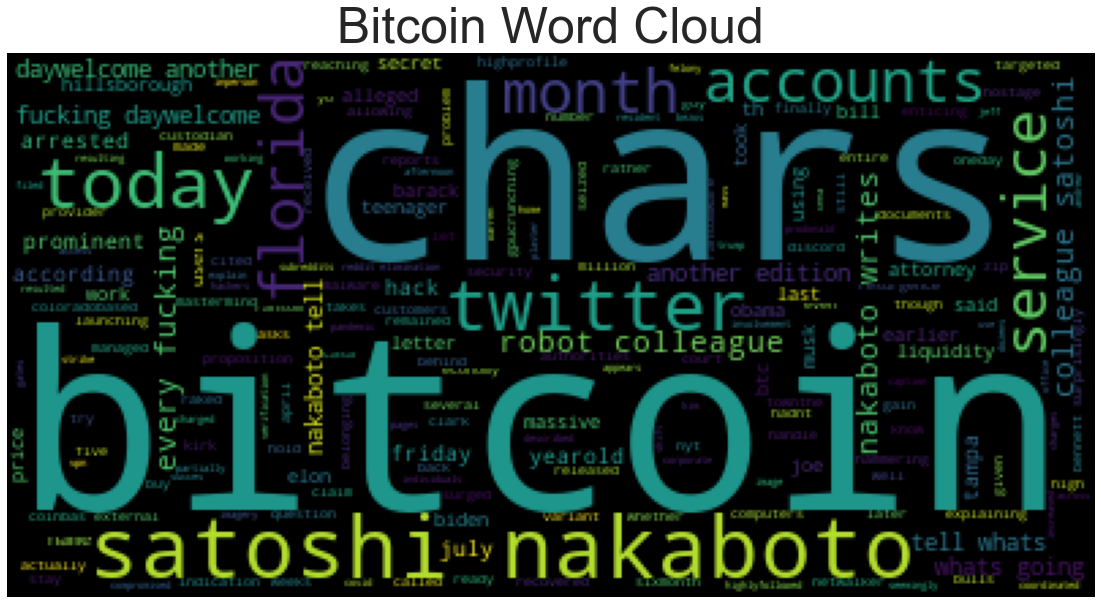

In [43]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(bitcoin_big_string))
plt.imshow(btc_wc)
plt.axis('off')
plt.title('Bitcoin Word Cloud', fontsize=50)

Text(0.5, 1.0, 'ethereum word cloud')

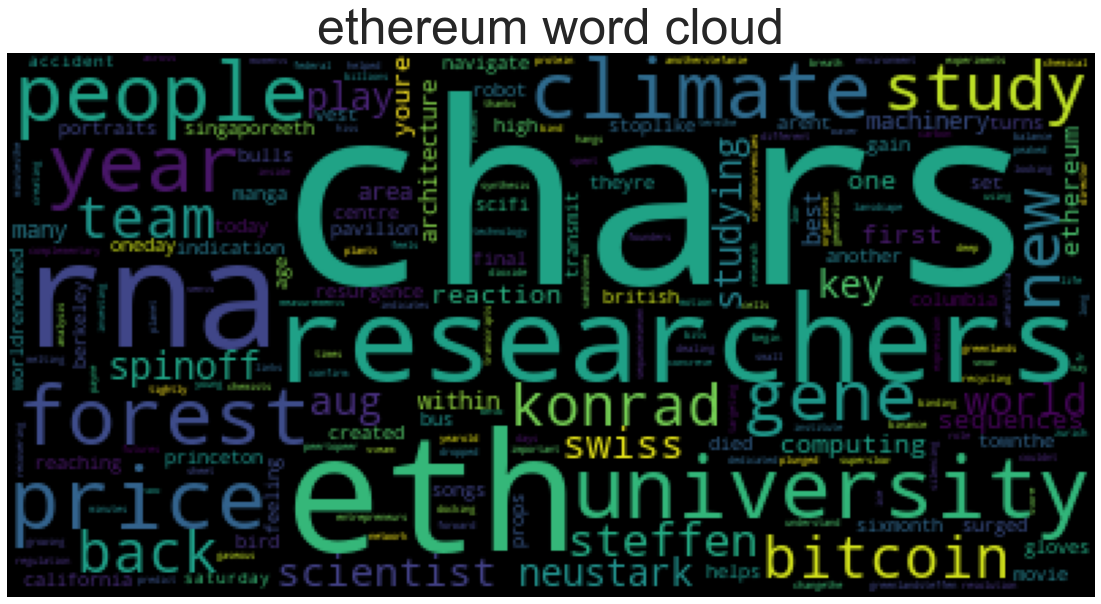

In [44]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(ethereum_big_string))
plt.imshow(eth_wc)
plt.axis('off')
plt.title('ethereum word cloud', fontsize=50)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [46]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [48]:
# Concatenate all of the bitcoin text together
all_btc = []

for text in btc['article']:
    all_btc.append(text)
all_btc = "".join(all_btc)
all_btc

'Authorities in Tampa, Florida have arrested a 17-year-old for being the alleged “mastermind” behind the Twitter Bitcoin hack that targeted several high-profile accounts on July 15th, 2020. His name h… [+463 chars]Casa, a Colorado-based provider of bitcoin security services, is launching a managed service allowing customers to buy and hold their own bitcoin, rather than using an external custodian like Coinbas… [+1571 chars]On July 15, a Discord user with the handle Kirk#5270 made an enticing proposition. I work for Twitter, they said, according to court documents released Friday. I can claim any name, let me know if yo… [+3660 chars]In April, the Secret Service seized 100 Bitcoins from Clark, NYT reports. Weeks later, Bennett received a letter explaining that the Secret Service had recovered 100 of his Bitcoins. The letter cited… [+884 chars]The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a one-day gain

In [49]:
# Run the NER processor on all of the text
btcoin_ner = nlp(all_btc)
# Add a title to the document
btcoin_ner.user_data["title"] = "Bitcoin NER"

In [50]:
# Render the visualization
displacy.render(btcoin_ner, style='ent')

In [51]:
# List all Entities
[(ent.text, ent.label_) for ent in btcoin_ner.ents]

[('Tampa', 'GPE'),
 ('Florida', 'GPE'),
 ('17-year-old', 'DATE'),
 ('Twitter Bitcoin', 'ORG'),
 ('July 15th, 2020', 'DATE'),
 ('Colorado', 'GPE'),
 ('Coinbas', 'ORG'),
 ('July 15', 'DATE'),
 ('Discord', 'GPE'),
 ('Twitter', 'ORG'),
 ('Friday', 'DATE'),
 ('April', 'DATE'),
 ('the Secret Service', 'ORG'),
 ('100', 'CARDINAL'),
 ('Bitcoins', 'ORG'),
 ('Clark', 'GPE'),
 ('Weeks later', 'DATE'),
 ('Bennett', 'PERSON'),
 ('the Secret Service', 'ORG'),
 ('100', 'CARDINAL'),
 ('bitcoin', 'GPE'),
 ('today', 'DATE'),
 ('1,268.19', 'MONEY'),
 ('six-month', 'DATE'),
 ('11,203.90', 'MONEY'),
 ('one-day', 'DATE'),
 ('12.73%', 'PERCENT'),
 ('months', 'DATE'),
 ('Guy', 'PERSON'),
 ('NetWalker', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('$25 million', 'MONEY'),
 ('the last five', 'DATE'),
 ('this month', 'DATE'),
 ('Twitter', 'ORG'),
 ('Elon Musk', 'PERSON'),
 ('Joe Biden', 'PERSON'),
 ('Barack Obama', 'PERSON'),
 ('Bill Gates', 'PERSON'),
 ('Jeff Bezos', 'PERSON'),
 ('Andrew Warren', 'PERSON'),
 ('today', 'DATE'

---

## Ethereum NER

In [52]:
# Concatenate all of the ethereum text together
all_ethereum = []
for text in eth['article']:
    all_ethereum.append(text)
all_ethereum = "".join(all_ethereum)
all_ethereum

'A team of researchers from the University of British Columbia, Princeton University, the University of California, Berkeley and the Singapore-ETH Centre have created a bus stop-like pavilion that can… [+172 chars]The bitcoin bulls are back in town.\r\nThe price of bitcoin surged today by $1,268.19, reaching a six-month high of $11,203.90, or a one-day gain of 12.73%. It’s another indication of the resurgence of… [+2562 chars]A robot that turns portraits into manga. A vest that helps people navigate. Gloves that transmit the feeling of bird songs. These arent props from the set of a Sci-Fi movie, theyre a few of the final… [+1773 chars]Konrad Steffen, a world-renowned climate scientist, died \xa0at the age of 68 on Saturday (Aug. 8) in an accident in Greenland.\r\nSteffen, the Director of the Swiss Federal Institute for Forest, Snow and… [+2697 chars]Across the lansdcape, steam vents hiss gaseous breath from deep inside the planet, creating an environment that feels like it hangs in th

In [53]:
# Run the NER processor on all of the text
ethereum_ner = nlp(all_ethereum)

# Add a title to the document
ethereum_ner.user_data["title"] = "Ethereum NER"

In [54]:
# Render the visualization
displacy.render(ethereum_ner, style='ent')

In [55]:
# List all Entities
[(ent.text, ent.label_) for ent in ethereum_ner.ents]

[('the University of British Columbia', 'ORG'),
 ('Princeton University', 'ORG'),
 ('the University of California, Berkeley', 'ORG'),
 ('the Singapore-ETH Centre', 'ORG'),
 ('today', 'DATE'),
 ('1,268.19', 'MONEY'),
 ('six-month', 'DATE'),
 ('11,203.90', 'MONEY'),
 ('one-day', 'DATE'),
 ('12.73%', 'PERCENT'),
 ('[+1773 chars]Konrad Steffen', 'PERSON'),
 ('the age of 68 on Saturday', 'DATE'),
 ('Aug. 8)', 'DATE'),
 ('Greenland', 'GPE'),
 ('Steffen', 'ORG'),
 ('the Swiss Federal Institute for Forest, Snow', 'ORG'),
 ('Stefanie Payne', 'PERSON'),
 ('A Year', 'DATE'),
 ('ETH', 'ORG'),
 ('Neustark', 'ORG'),
 ('two', 'CARDINAL'),
 ('ETH', 'ORG'),
 ('Neustark', 'ORG'),
 ('68-year-old', 'DATE'),
 ('Swiss', 'NORP'),
 ('30 years', 'DATE'),
 ('Greenland', 'GPE'),
 ('RNA', 'PRODUCT'),
 ('RNA', 'WORK_OF_ART'),
 ('first', 'ORDINAL'),
 ('years', 'DATE'),
 ('first', 'ORDINAL'),
 ('These days', 'DATE'),
 ('Zurich', 'GPE'),
 ('RNA', 'ORG'),
 ('billions', 'CARDINAL'),
 ('RNA', 'WORK_OF_ART'),
 ('Aug. 2',